In [1]:
from matplotlib import pyplot as plt
from pandas import DataFrame, read_excel, melt, crosstab
import seaborn as sb
import pandas as pd
import numpy as np
import sys

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams["axes.unicode_minus"] = False

### 문제1
다음 데이터는 조선시대 역대 왕의 수명을 조사한 데이터이다. 수명에 대해 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

In [3]:
df1 = read_excel("https://data.hossam.kr/D02/kings_life.xlsx")
df1

,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38
5,단종,16
6,세조,51
7,예종,28
8,성종,37
9,연산,30


In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
수명,27.0,46.037037,16.173296,16.0,33.0,45.0,56.0,82.0


조선시대 왕 27명의 평균은 수명은 약 46세이며 가장 일찍 사망한 왕의 나이는 16세, 가장 늦게 사망한 왕의 나이는 82세이다. 가장 많이 죽은 사망한 나이는 45세이고 대부분 33세에서 56세 사이에 사망했다.

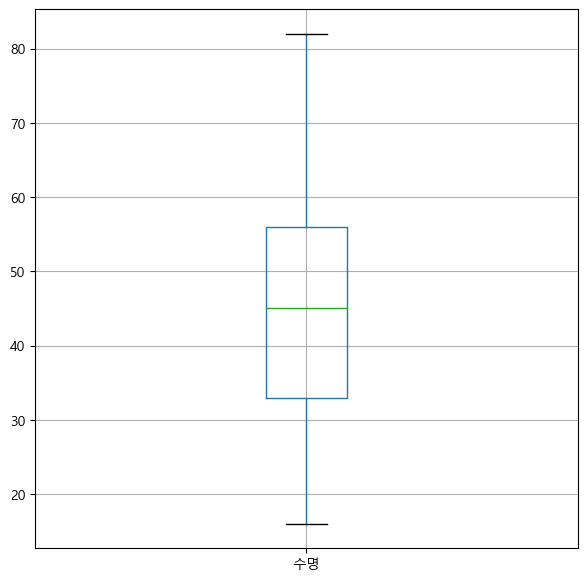

In [5]:
plt.figure()
df1.boxplot(['수명'])
plt.show()
plt.close()

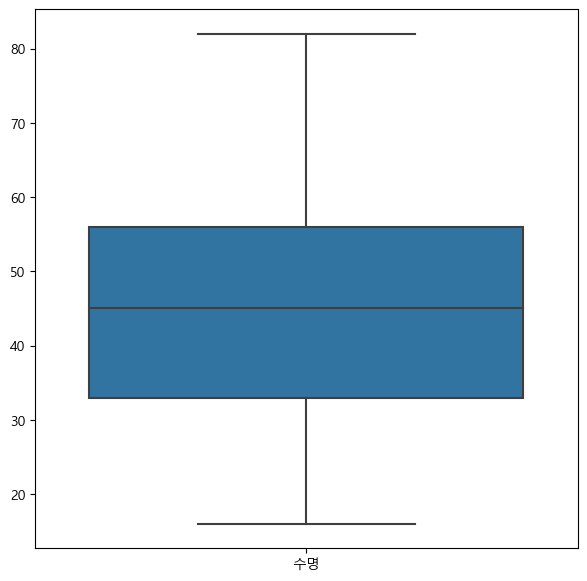

In [47]:
plt.figure()
sb.boxplot(data=df1)
plt.show()
plt.close()


#### 문제 2
다음은 상장된 금융사 중 외국기업(F)과 내국기업(K)의 주가이다. 외국기업과 내국기업별로 기술통계량을 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 
토대로 하여 알 수 있는 사실을 하나 이상 제시하라.



In [6]:
df2 = read_excel("https://data.hossam.kr/D02/stock.xlsx")
df2

,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


In [7]:
df2.groupby('구분').describe()

주가                                                            
   count        mean        std    min     25%    50%     75%    max
구분                                                                  
F   12.0  155.166667  27.764704  120.0  142.75  150.0  158.00  235.0
K   12.0  150.833333  21.425700  102.0  142.50  154.0  166.25  173.0

12개의 상장된 외국기업은 평균 주가로 155를 가지고 있고, 걔 중 가장 낮은 가격은 120이고 가장 높은 가격은 235이다. 대부분의 기업은 142.75에서 158사이에 위치한다.

12개의 상장된 국내기업은 평균 주가로 150을 가지고 있고, 걔 중 가장 낮은 가격은 102이고 가장 높은 가격은 173이다. 대부분의 기업은 142.50에서 166.25사이에 위치한다.

In [8]:
df2['구분'] =np.where(df2['구분'] == "F", "외국 기업","국내 기업")
df2

,구분,주가
0,외국 기업,120
1,국내 기업,165
2,국내 기업,147
3,외국 기업,144
4,국내 기업,135
5,국내 기업,161
6,국내 기업,102
7,국내 기업,165
8,국내 기업,170
9,외국 기업,147


국내 기업, 외국 기업 각각 dataframe 만들기

In [32]:
df_K = df2.query("구분 == '국내 기업'")
df_F = df2.query("구분 == '외국 기업'")
df_K

,구분,주가
1,국내 기업,165
2,국내 기업,147
4,국내 기업,135
5,국내 기업,161
6,국내 기업,102
7,국내 기업,165
8,국내 기업,170
15,국내 기업,173
19,국내 기업,173
21,국내 기업,145


<Figure size 700x700 with 0 Axes>

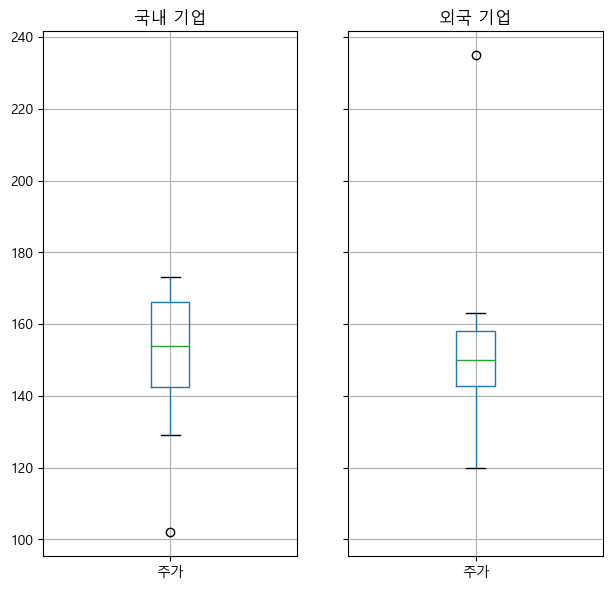

In [9]:
plt.figure()
df2.groupby('구분').boxplot()
plt.show()
plt.close()

위의 기술통계표에서 우리는 국내기업보다 외국기업의 평균 주가가 더 높다는 것을 확인할 수 있었다. 그러나 박스플롯에서 보이듯이 가장 높은 주가의 국내 기업이 외국 기업보다 높고 median 값 역시 국내 기업이 154로 외국 기업의 150보다 4가량 높다. 이를 통해 우리는 각 국가의 상위 50% 기업 중국내 기업이 주가가 더 높은 경향이 많은 것을 알 수 있고 또한 IQR이 큰 것으로 보아 국내 기업의 주가의 편차가 더 큰 것을 알 수 있다.

주가의 변동 폭은 'F보다 'K'가 크다. K는 폭락지점이 보이고, F는 상승지점이 보인다.

#### 문제 3
포도농장에서 수집한 비료 종류에 따른 수확량 자료이다. 기술통계량을 구하고 상자그림을 그려라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.



In [10]:
df3 = read_excel("https://data.hossam.kr/D02/grape.xlsx")
df3

,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8
5,A,28.5
6,A,24.2
7,A,17.9
8,B,16.5
9,B,21.1


In [11]:
df3.groupby('비료종류').describe()

수확량                                                       
     count       mean       std   min     25%   50%     75%   max
비료종류                                                             
A      7.0  26.357143  6.578211  17.9  23.950  24.3  27.550  39.3
B      4.0  18.700000  6.172520  11.4  15.225  18.8  22.275  25.8

In [12]:
df3_A = df3.query("비료종류 == 'A'")
df3_B = df3.query("비료종류 == 'B'")
diff = df3_A['수확량'].mean()-df3_B['수확량'].mean()
diff

7.657142857142858

비료 A를 사용한 경우 평균 생산량이 26.3.3으로 비료 B를 사용했을 때보다 7.65kg 더 많이 생산 할 수 있다.

A         Axes(0.1,0.15;0.363636x0.75)
B    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

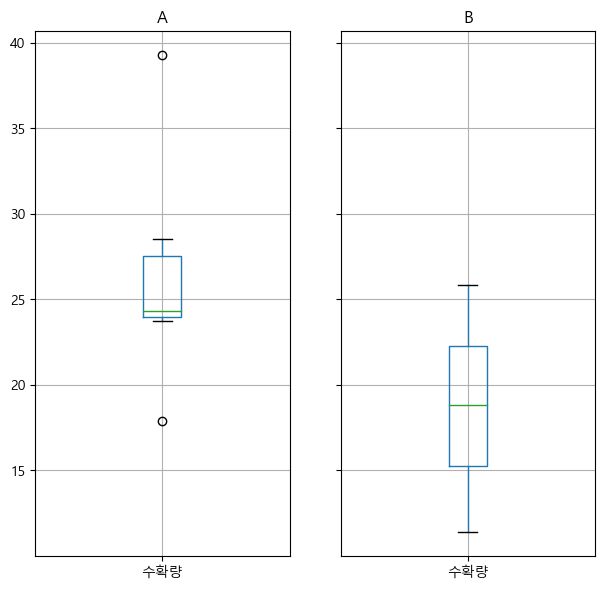

In [13]:
df3.groupby('비료종류').boxplot()

A비료를 사용하였을 때 B 사료를 사용했을 때보다 생산량이 평균 수확량이 6이상 차이날 정도로 전체 생산량이 차이가 난다.

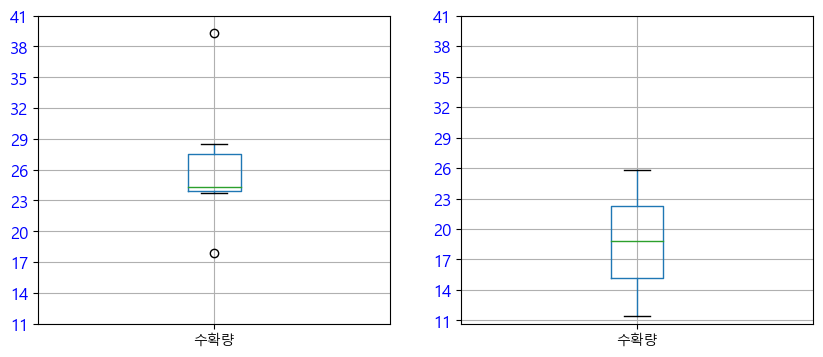

In [14]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
df3_A.boxplot(ax= ax1)
df3_B.boxplot(ax=ax2)
max = int(df3_A.max()[1])
min = int(df3_B.min()[1])
yticks = list(range(min,max+3,3))
ax1.set_yticks(yticks)
ax2.set_yticks(yticks)
ax1.set_yticklabels(yticks, fontsize=12, color = 'blue')
ax2.set_yticklabels(yticks, fontsize=12, color = 'blue')
plt.show()
plt.close()

#### 문제 4
다음은 통계학개론을 수강하는 두 학과(A, C)의 성적분포이다. 이 두 그룹을 비교하기 위한 기술통계량을 구하고 상자그림을 그려서 비교/분석하라. 최종적으로 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.



In [15]:
df4 = read_excel("https://data.hossam.kr/D02/analysis_grade.xlsx")
df4

,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67
5,C,43
6,A,73
7,C,51
8,C,55
9,A,15


In [36]:
df4_A = df4.query("학과 == 'A'")
df4_A.reset_index(drop=True,inplace=True)
df4_A

,학과,점수
0,A,52
1,A,37
2,A,67
3,A,73
4,A,15
5,A,18
6,A,23
7,A,10
8,A,39
9,A,41


In [38]:
df4_C = df4.query("학과 == 'C'")
df4_C.reset_index(drop=True,inplace=True)
df4_C

,학과,점수
0,C,54
1,C,41
2,C,43
3,C,51
4,C,55
5,C,52
6,C,48
7,C,51
8,C,82
9,C,90


In [ ]:
df4_1 =

In [16]:
df4.groupby('학과').describe()

점수                                                      
   count       mean        std   min    25%   50%    75%   max
학과                                                            
A   20.0  43.750000  20.229928  10.0  29.50  42.5  55.00  78.0
C   12.0  56.166667  14.689720  41.0  50.25  52.5  54.25  90.0

A         Axes(0.1,0.15;0.363636x0.75)
C    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

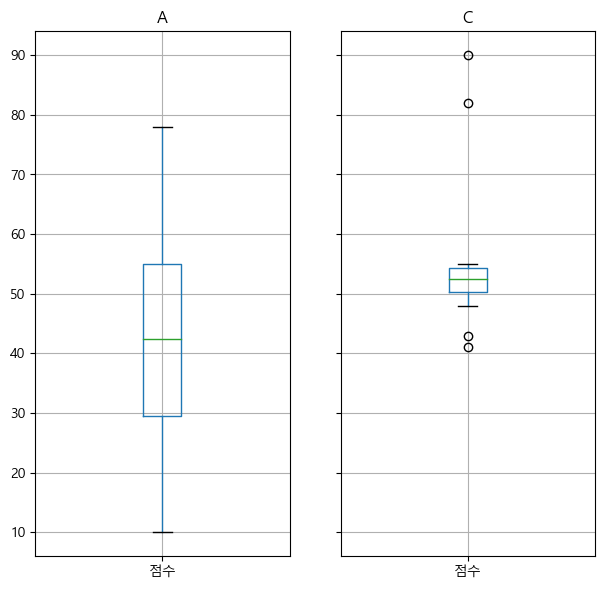

In [17]:
df4.groupby('학과').boxplot()

C학과 학생들의 평균점수가 더 높으며 C학과는 대부분의 학생의 점수가 50점 초중반에 편향되어있는 반면 A학과 학생들의 점수는 30점에서부터 55점으로 편차가 크게 분포되어있다. 이를 통해 A학과 학생들의 서로 간의 점수차이가 큰 것을 알 수 있다. 따라서 C학과 학생들이 전체적으로 학업성적이 더 높다는 것을 알 수 있다.

#### 문제 5
다음은 통계학 전공(STAT) 학생과 전산학 전공(COMP) 학생의 통계학 과목에 대한 중간고사 성적과 기말시험 성적을 나타낸 표이다.

(1) 전공에서 STAT를 1로, COMP를 2로 변환한 레이블을 적용하라.

(2) 중간고사 및 기말고사 성적에 대한 각종 기술통계량을 구하고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(3) 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, 분석 결과를 토대로 하여 알 수 있는 사실을 하나 이상 제시하라.

(4) 전공별로 중간고사 및 기말고사 성적에 대한 히스토그램을 그리고, (3)번의 결과와 비교 하라.



In [18]:
df5 = read_excel('http://data.hossam.kr/D02/stat_comp_grade.xlsx')
df5

,전공,중간고사,기말고사
0,STAT,34,86
1,STAT,50,77
2,STAT,75,74
3,COMP,76,96
4,COMP,61,78
5,COMP,65,40
6,COMP,31,68
7,STAT,47,57
8,STAT,94,82
9,COMP,49,57


In [19]:
df5['전공'] =np.where(df5['전공'] == "STAT", 1,2)
df5


,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
7,1,47,57
8,1,94,82
9,2,49,57


In [20]:
df5.groupby('전공').describe()

중간고사                                                      기말고사             \
   count       mean        std   min   25%   50%   75%   max count       mean   
전공                                                                              
1   12.0  64.833333  21.225342  34.0  47.0  67.5  80.5  94.0  12.0  76.166667   
2    8.0  65.625000  18.423103  31.0  58.0  70.5  77.0  87.0   8.0  74.875000   

                                               
          std   min    25%   50%    75%   max  
전공                                             
1   13.953386  53.0  67.50  78.5  85.25  95.0  
2   18.795421  40.0  65.25  81.5  86.25  96.0

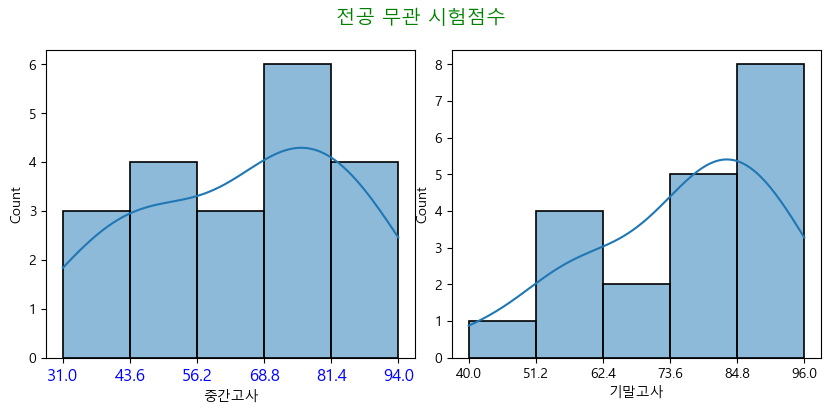

<Figure size 700x700 with 0 Axes>

In [53]:
fig , (ax1, ax2) = plt.subplots(1, 2, figsize = (10,4))
fig.suptitle('전공 무관 시험점수', fontsize=14, color = 'green')
fig.subplots_adjust(wspace=0.1)
hist1, bins1 = np.histogram(df5['중간고사'],bins=5)
hist2, bins2 = np.histogram(df5['기말고사'], bins = 5)
plt.figure()
sb.histplot(data = df5, x = '중간고사', bins =5,  edgecolor = 'black', linewidth= 1.2, ax = ax1, kde = True)
sb.histplot(data = df5 , x = '기말고사', bins =5,  edgecolor = 'black', linewidth= 1.2, ax = ax2, kde = True)
ax1.set_xticks(bins1)
ax2.set_xticks(bins2)
ax1.set_xticklabels(bins1, fontsize=12, color = 'blue')
# ax2.set_xticklabels(bins2, fontsize=12, color = 'blue')
plt.show()
plt.close()

중간고사 때는 비교적 31에서 94 사이에서 고르게 분포되어었지만 기말고사에서는 고득점을 받은 학생들의 수가 많아졌다.

In [22]:
df5_1 = df5.query('전공 == 1')
df5_1

,전공,중간고사,기말고사
0,1,34,86
1,1,50,77
2,1,75,74
7,1,47,57
8,1,94,82
10,1,38,53
11,1,65,70
12,1,47,60
13,1,88,95
16,1,92,95


In [23]:
df5_2 = df5.query('전공 == 2')
df5_2

,전공,중간고사,기말고사
3,2,76,96
4,2,61,78
5,2,65,40
6,2,31,68
9,2,49,57
14,2,80,85
15,2,87,90
19,2,76,85


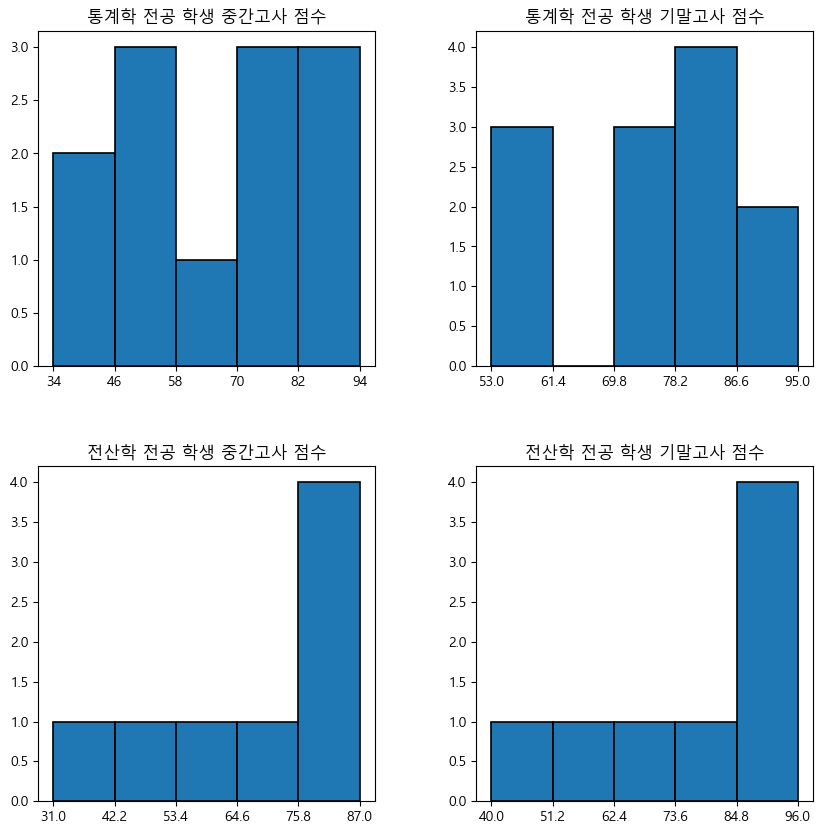

<Figure size 700x700 with 0 Axes>

In [46]:
fig , ((ax1, ax2) , (ax3,ax4)) = plt.subplots(2, 2, figsize = (10,10))
hist1, bins1 = np.histogram(df5_1['중간고사'],bins=5)
hist2, bins2 = np.histogram(df5_1['기말고사'], bins = 5)
hist3, bins3 = np.histogram(df5_2['중간고사'],bins=5 )
hist4, bins4 = np.histogram(df5_2['기말고사'], bins = 5)
plt.figure()
df5_1.hist('중간고사', bins =5 , edgecolor = 'black', linewidth= 1.2, ax = ax1,grid=False)
ax1.title.set_text('통계학 전공 학생 중간고사 점수')
df5_1.hist('기말고사', bins =5 , edgecolor = 'black', linewidth= 1.2, ax = ax2,grid=False)
ax2.title.set_text('통계학 전공 학생 기말고사 점수')
df5_2.hist('중간고사', bins =5 , edgecolor = 'black', linewidth= 1.2, ax = ax3,grid=False)
ax3.title.set_text('전산학 전공 학생 중간고사 점수')
df5_2.hist('기말고사', bins =5 , edgecolor = 'black', linewidth= 1.2, ax = ax4,grid=False)
ax4.title.set_text('전산학 전공 학생 기말고사 점수')
ax1.set_xticks(bins1)
ax2.set_xticks(bins2)
ax3.set_xticks(bins3)
ax4.set_xticks(bins4)
plt.show()
plt.close()

전산학 전공학생들이 통계학 전공 학생들보다 비교적 고득점을 받는 학생들의 비율이 높다.